Initialize euler ...
Time: 20.000
Divergence: 2.06e-05
Time: 40.000
Divergence: 8.82e-06
Write out/Ra3.16e+03_T.h5 ...
Write out/Ra3.16e+03_U.h5 ...
Write out/Ra3.16e+03_V.h5 ...
Read out/Ra3.16e+03_T.h5 ...
Read out/Ra3.16e+03_U.h5 ...
Read out/Ra3.16e+03_V.h5 ...


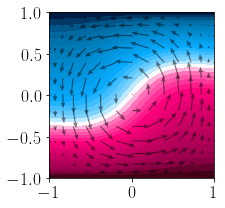

Nubot: 1.229257e+00
Nutop: 1.229257e+00
Nuvol: 1.227890e+00


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from pypde import *
from example.rbc2d import NavierStokes,nu,kappa,steady_fun
from pypde.field_operations import eval_Nu, eval_Nuvol
from scipy import optimize
import time

# -- Initialize Navier Stokes Solver
shape = (128,128)
Ra = 5e3
Ra = np.logspace(3.5,3.5,1)[0]
Pr = 1

NS = NavierStokes(shape=shape,dt=0.1,tsave=20.,
                  nu=nu(Ra/2.**3,Pr),kappa=kappa(Ra/2.**3,Pr),
                  dealias=True,integrator="eu",beta=1.0)
NS.iterate(40)

 # Write file
leading_str = "out/Ra{:4.2e}_".format(Ra) 
NS.write(leading_str=leading_str,add_time=False)
# Read file
NS.read(leading_str=leading_str,add_time=False)
NS.plot()

# -- Eval Nu
Nuz,Nuv = NS.eval_Nu()

### Steady state

0:  |F(x)| = 0.0387312; step 1
1:  |F(x)| = 0.045747; step 1
2:  |F(x)| = 0.0633411; step 1
3:  |F(x)| = 0.0661365; step 1
4:  |F(x)| = 0.0339336; step 1
5:  |F(x)| = 0.01329; step 1
6:  |F(x)| = 0.0134247; step 1
7:  |F(x)| = 0.00770915; step 0.10485
8:  |F(x)| = 0.00578734; step 1
9:  |F(x)| = 0.00549437; step 1
10:  |F(x)| = 0.00594378; step 0.146159
11:  |F(x)| = 0.00279958; step 1
12:  |F(x)| = 0.000899717; step 1
13:  |F(x)| = 0.0317715; step 1
14:  |F(x)| = 0.0348802; step 1
15:  |F(x)| = 0.0100418; step 1
16:  |F(x)| = 0.0102934; step 1
17:  |F(x)| = 0.00744651; step 0.0734965
18:  |F(x)| = 0.00687118; step 1
19:  |F(x)| = 0.00734915; step 1
20:  |F(x)| = 0.00458919; step 0.232096
21:  |F(x)| = 0.00456474; step 1
22:  |F(x)| = 0.00682222; step 1
23:  |F(x)| = 0.00604077; step 0.423142
24:  |F(x)| = 0.0045364; step 0.0966337
25:  |F(x)| = 0.00312732; step 0.385574
26:  |F(x)| = 0.00319658; step 1
27:  |F(x)| = 0.00323503; step 1
28:  |F(x)| = 0.00289308; step 0.131189
29:  |F(x)

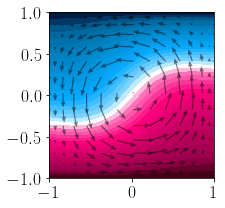

Nubot: 1.222739e+00
Nutop: 1.222739e+00
Nuvol: 1.222682e+00


(1.2227391374566157, 1.2226822257442078)

In [14]:
sol = NS.solve_steady_state()

# Plot
NS.plot()
NS.eval_Nu()

### Multiple Steady State Calculations

Initialize euler ...
0.050297337187317416
0.050297337187317416
0:  |F(x)| = 0.0400167; step 1
1:  |F(x)| = 0.0477883; step 1
2:  |F(x)| = 0.0475941; step 1
3:  |F(x)| = 0.0401091; step 0.221389
4:  |F(x)| = 0.036768; step 0.239914
5:  |F(x)| = 0.0167849; step 0.392062
6:  |F(x)| = 0.0127833; step 1
7:  |F(x)| = 0.0140112; step 0.486788
8:  |F(x)| = 0.00671828; step 1
9:  |F(x)| = 0.00581387; step 1
10:  |F(x)| = 0.0107442; step 1
11:  |F(x)| = 0.0174945; step 1
12:  |F(x)| = 0.0190719; step 1
13:  |F(x)| = 0.0218803; step 1
14:  |F(x)| = 0.0195151; step 0.276477
15:  |F(x)| = 0.0113912; step 1
16:  |F(x)| = 0.00670887; step 1
17:  |F(x)| = 0.0146855; step 1
18:  |F(x)| = 0.00961193; step 1
19:  |F(x)| = 0.00821423; step 1
20:  |F(x)| = 0.0133307; step 1
21:  |F(x)| = 0.0161858; step 1
22:  |F(x)| = 0.0166258; step 1
23:  |F(x)| = 0.0119365; step 1
24:  |F(x)| = 0.0104768; step 0.297737
25:  |F(x)| = 0.00447429; step 1
26:  |F(x)| = 0.00340839; step 1
27:  |F(x)| = 0.0046715; step 1
28:

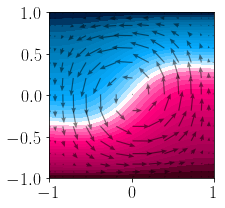

Write out/Ra3.16e+03_T.h5 ...
Write out/Ra3.16e+03_U.h5 ...
Write out/Ra3.16e+03_V.h5 ...
Initialize euler ...
0.04748374821990745
0.04748374821990745
0:  |F(x)| = 0.544996; step 1
1:  |F(x)| = 0.569891; step 1
2:  |F(x)| = 0.491502; step 1
3:  |F(x)| = 0.490138; step 1
4:  |F(x)| = 0.490127; step 1
5:  |F(x)| = 0.495242; step 1
6:  |F(x)| = 0.495458; step 1
7:  |F(x)| = 0.499517; step 1
8:  |F(x)| = 0.499762; step 1
9:  |F(x)| = 0.506539; step 1
10:  |F(x)| = 0.506914; step 1
11:  |F(x)| = 0.545832; step 1
12:  |F(x)| = 0.547448; step 1
13:  |F(x)| = 0.45274; step 1
14:  |F(x)| = 0.449116; step 1
15:  |F(x)| = 0.449013; step 1
16:  |F(x)| = 0.44979; step 1
17:  |F(x)| = 0.449983; step 1
18:  |F(x)| = 0.45075; step 1
19:  |F(x)| = 0.450942; step 1
20:  |F(x)| = 0.451704; step 1
21:  |F(x)| = 0.451893; step 1
22:  |F(x)| = 0.450911; step 1
23:  |F(x)| = 0.450908; step 0.105633
24:  |F(x)| = 0.422134; step 1
25:  |F(x)| = 0.421264; step 1
26:  |F(x)| = 0.421144; step 1
27:  |F(x)| = 0.42

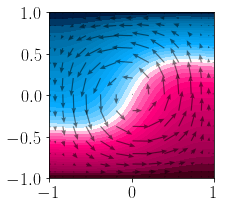

Write out/Ra3.55e+03_T.h5 ...
Write out/Ra3.55e+03_U.h5 ...
Write out/Ra3.55e+03_V.h5 ...
Initialize euler ...
0.04482754895382597
0.04482754895382597
0:  |F(x)| = 0.158356; step 1
1:  |F(x)| = 0.163071; step 1
2:  |F(x)| = 0.0937212; step 1
3:  |F(x)| = 0.0907776; step 1
4:  |F(x)| = 0.0303032; step 1
5:  |F(x)| = 0.0175402; step 0.11837
6:  |F(x)| = 0.00771585; step 1
7:  |F(x)| = 0.0194018; step 1
8:  |F(x)| = 0.0818679; step 1
9:  |F(x)| = 0.087682; step 1
10:  |F(x)| = 0.0877116; step 1
11:  |F(x)| = 0.093171; step 0.252239
12:  |F(x)| = 0.0912119; step 0.0481389
13:  |F(x)| = 0.0911869; step 1
14:  |F(x)| = 0.0909135; step 1
15:  |F(x)| = 0.0908427; step 1
16:  |F(x)| = 0.0911129; step 1
17:  |F(x)| = 0.0911051; step 0.00434102
18:  |F(x)| = 0.0133376; step 1
19:  |F(x)| = 0.0136019; step 1
20:  |F(x)| = 0.00830944; step 1
21:  |F(x)| = 0.00531346; step 1
22:  |F(x)| = 0.00747208; step 0.270337
23:  |F(x)| = 0.00516847; step 1


KeyboardInterrupt: 

In [4]:
Nu_dict = {} # Dict to store all Nusselt number calculated on the fly
Ra_all = np.logspace(3.5,3.6,3)

X0 = None
for Ra in Ra_all:
    if Ra in Nu_dict:
        print("Ra is already there! Skip ...")
        continue
    
    # Update Parameters
    NS.kappa = kappa(Ra/2.**3,Pr)
    NS.nu = nu(Ra/2.**3,Pr)
    NS.setup_solver()
    
    # Solve Steady State
    sol = NS.solve_steady_state(X0=X0,maxiter=300,tol=1e-4)
    X0 = sol.x
    
    NS.T.backward()
    NS.U.backward()
    NS.V.backward()
    
    # Evaluate Nusselt
    Nu,Nuv = NS.eval_Nu()
    Nu_dict[Ra] = Nu
    
    # Plot
    fig,ax = NS.plot(return_fig=True)
    figname = "out/Ra_{:4.2e}.png".format(Ra)
    fig.savefig(figname)
    plt.show()
    
    # Write to file
    leading_str = "out/Ra{:4.2e}_".format(Ra) 
    NS.write(leading_str=leading_str,add_time=False)

In [5]:
# Write Nu_dict
import json

with open('out/Nu_dict.json', 'w') as fp:
    json.dump(Nu_dict, fp)

In [6]:
# Read Nu_dict
import json

with open('out/Nu_dict.json') as json_file:
    Nu_dict = json.load(json_file)

### Plot Nu

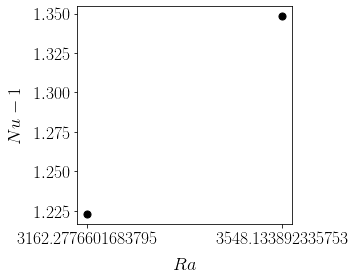

In [11]:
RaL,NuL=[],[]
for r in Nu_dict:
    RaL.append(r)
    NuL.append(Nu_dict[r])

fig,ax = plt.subplots(figsize=(5,4))
ax.scatter(RaL,NuL,s=50)
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel(r"$Ra$")
ax.set_ylabel(r"$Nu-1$")
#fig.savefig("Nu.png")
plt.show()

In [8]:
Nu_dict

{'3162.2776601683795': 1.2229188751934292,
 '3548.133892335753': 1.3482377954963853}